# TD: Classification supervisée et SVM

L'énoncé du TD-notebook constitue la base du compte-rendu. Répondez aux questions dans le document et copiez les lignes de code qui ont produit les résultats aux endroits indiqués.

Le TD comprend 2 parties:
* Une prise de contact avec l'algorithme SVM et ses paramètres pour la classification binaire;
* Classification multi-classe, et application à la reconnaissance de chiffres manuscrits.


## Partie 1: Classification binaire avec SVM

On se propose dans cette première partie d'évaluer l'influence des différents paramètres d'apprentissage des SVM, et de développer une démarche permettant de les choisir en fonction de la nature de la distribution des données. On ne testera dans cette première partie que des distributions 2D pour visualiser les phénomènes.

Les calculs utiliseront la bibliothèque de Machine Learning [scikit-learn](http://scikit-learn.org/stable/modules/classes.html).

Chaque jeu de données est constitué de quatre ensembles :
* Un ensemble de données test utilisées pour l'apprentissage : trainX
* Un ensemble de classes associées aux données d'apprentissage : trainY
* Un ensemble de données à tester : testX
* Un ensemble de classes associées aux données de test : testY

Ils sont générés par la fonction :

>```python
trainX, trainY, testX, testY = td.generate_data(family_number)
```

où family_number est un nombre entre 0 et 3. Chaque famille de données est caractérisée par une distribution différente.

On peut la visualiser par la fonction (déjà vue) :

>```python
td.show_data_2D(trainX, trainY)
```

L'objectif est d'optimiser les paramètres des SVM pour construire un classifieur capable de prédire les classes des données de test.

Dans la bibliothèque scikit-learn, l'algorithme standard des SVM pour la classification est utilisable à travers la classe [`sklearn.svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

On retrouve la structure déjà utilisée dans les TD précédents:
* La définition des paramètres (par le consructeur de classe).
* Le calcul de l'hyperplan: `fit`
* La prédiction de classe pour de nouvelles données: `predict`
* Le calcul d'erreur de prédiction: `score`

Le classifieur peut être visualisé par la fonction :
>```python
td.plot_svc_decision_function(classifier)
```

Remarque: Pour visualiser dans le notebook, appliquer l'instruction:
>```python
plt.show()
```

après chaque fonction de visualisation.


### Activité 1.1 : Mon premier classifieur.


Repérer les paramètres utiles des fonctions et la manière de les utiliser.

Lancer une première chaîne de calcul pour apprendre un classifieur linéaire pour le jeu de données 0 et des valeurs par défaut.

Visualiser les résultats et calculer l’erreur sur les jeux d’apprentissage et de test avec la fonction `score`.

Recommencer la séquence d'apprentissage avec les autres distributions de données (1 à 3).


In [1]:
# Exécuter la fonction suivante pour charger les fonctions de visualisation et le générateur de données
!wget https://raw.githubusercontent.com/stepherbin/teaching/master/ENSTA/td_util.py

--2024-11-26 09:36:44--  https://raw.githubusercontent.com/stepherbin/teaching/master/ENSTA/td_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8835 (8.6K) [text/plain]
Saving to: ‘td_util.py’

td_util.py          100%[===================>]   8.63K  --.-KB/s    in 0s      

2024-11-26 09:36:44 (71.1 MB/s) - ‘td_util.py’ saved [8835/8835]



In [2]:
# Librairies utiles standard
import numpy as np
import matplotlib.pyplot as plt

# L'algorithme SVM dans la bibliothèque scikit-learn
from sklearn import svm

# Pour visualiser et récupérer les données
import td_util as td

import random

Gaussian two class isovariance samples


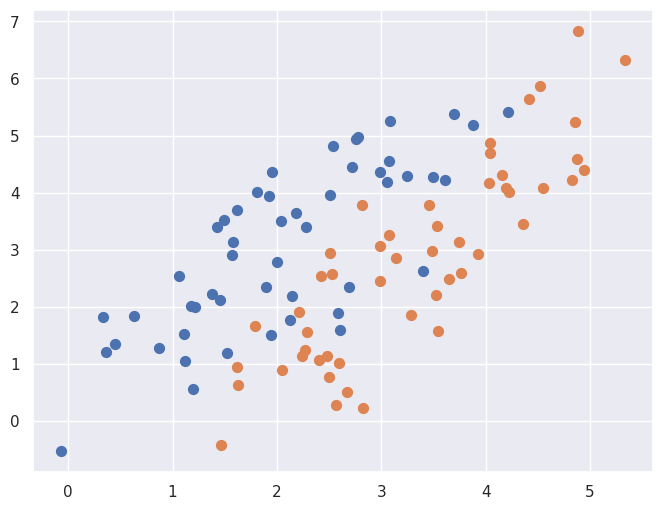

In [3]:
# Classifieur
svc = svm.SVC(kernel='linear', max_iter=-1)

# Premier jeu de données
trainX, trainY, testX, testY=td.generate_data(0)

td.show_data_2D(trainX,trainY)
plt.show()

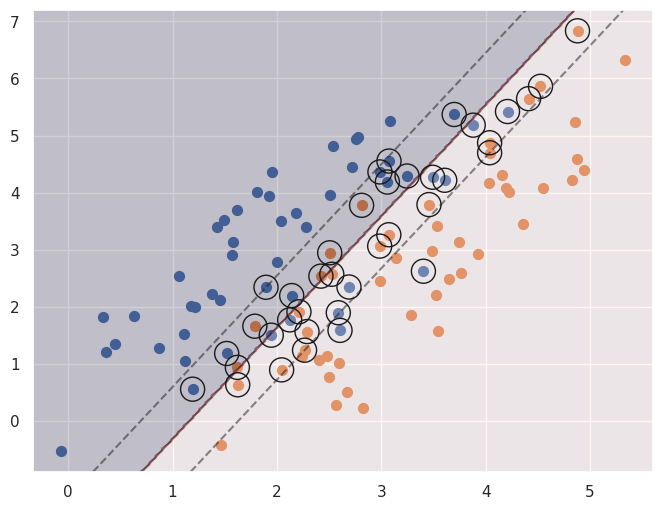

Erreur d'apprentissage = 15.0%
Erreur de test = 6.0%


In [5]:
#######################
# METTRE VOTRE CODE ICI
svc.fit(trainX, trainY)

td.show_data_2D(trainX,trainY)
td.plot_svc_decision_function(svc,plot_support=True)
plt.show()
######################

score_train = svc.score(trainX, trainY) # à remplir
print("Erreur d'apprentissage = {:.1f}%".format((1-score_train)*100))

score_test = svc.score(testX, testY) # à remplir
print("Erreur de test = {:.1f}%".format((1-score_test)*100))


Recommencer la séquence d'apprentissage avec les autres distributions de données (1 à 3).


Gaussian two class heterogeneous variance samples


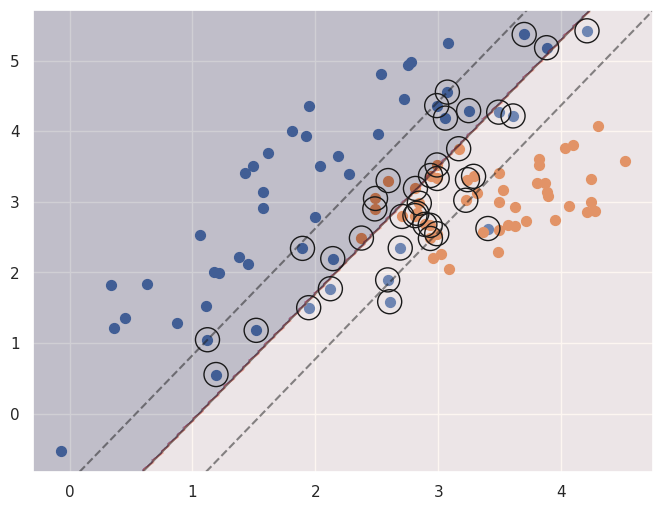

Erreur d'apprentissage = 15.0%
Erreur de test = 6.5%
Intricated data


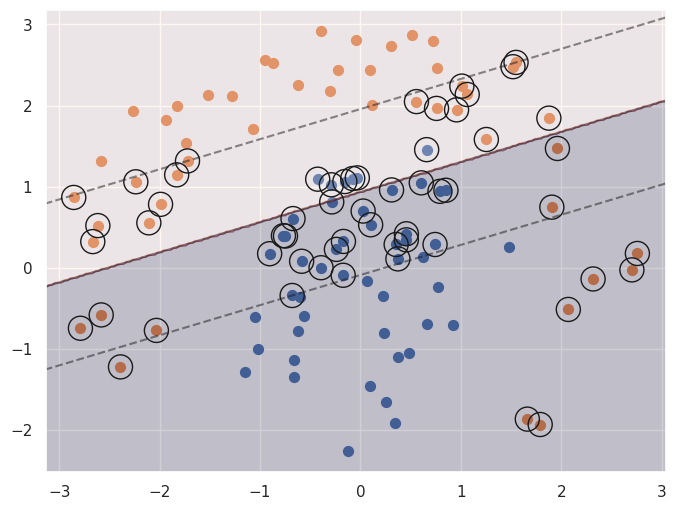

Erreur d'apprentissage = 18.0%
Erreur de test = 22.5%
XOR like distribution


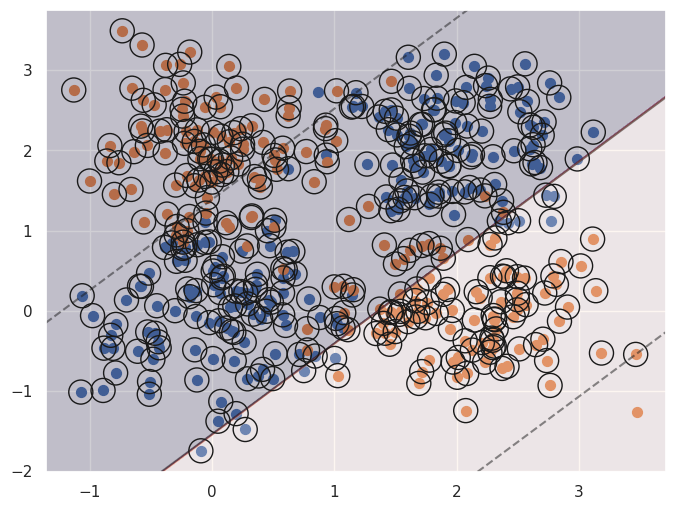

Erreur d'apprentissage = 32.5%
Erreur de test = 30.8%


In [6]:
for itest in [1,2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest)

    ##########################
    # METTRE VOTRE CODE ICI
    svc.fit(trainX, trainY)

    td.show_data_2D(trainX,trainY)
    td.plot_svc_decision_function(svc,plot_support=True)
    plt.show()

    score_train = svc.score(trainX, trainY) # à remplir
    print("Erreur d'apprentissage = {:.1f}%".format((1-score_train)*100))

    score_test = svc.score(testX, testY) # à remplir
    print("Erreur de test = {:.1f}%".format((1-score_test)*100))


<div class="alert alert-block alert-success">
QUESTION: Expliquez les différences de comportement du classifieur.
</div>

**Réponse**

Certaines distributions de données ne sont pas linéairement séparables (données 2 et 3). Le noyau linéaire des SVM n'est alors pas adapté. La distribution 3 produit une erreur proche du taux maximal pour la discrimination de 2 classes (50%).

### Activité 1.2: Influence du noyau

Repérer comment spécifier le type de noyau utilisé, et ses paramètres.

Reprendre l'étude précédente en jouant sur le type de noyau et sur ses paramètres.

Illustrer les différences en utilisant la fonction de visualisation `td.plot_svc_decision_function`.


Gaussian two class heterogeneous variance samples
Gaussian two class heterogeneous variance samples


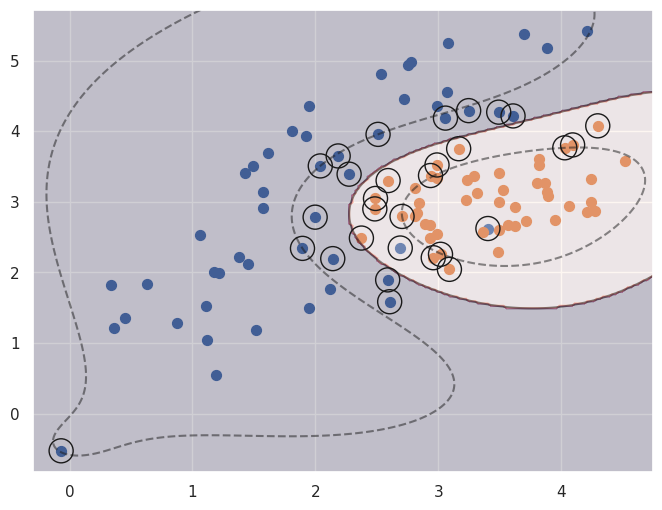

Erreur d'apprentissage = 2.0%
Erreur de test = 4.5%
Intricated data
Intricated data


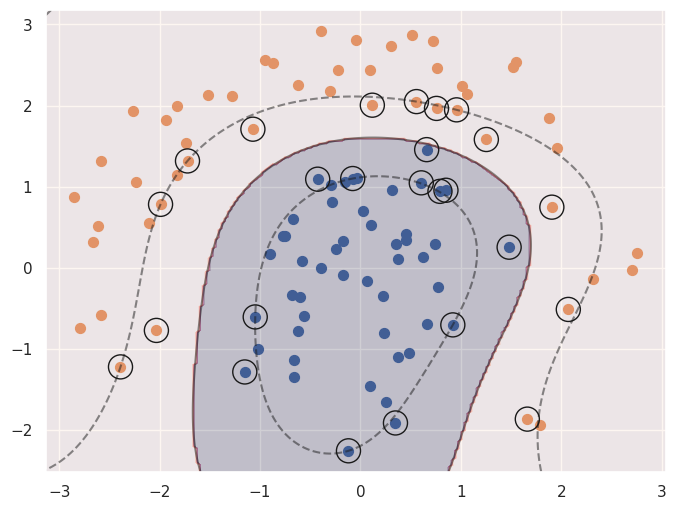

Erreur d'apprentissage = 0.0%
Erreur de test = 2.5%
XOR like distribution
XOR like distribution


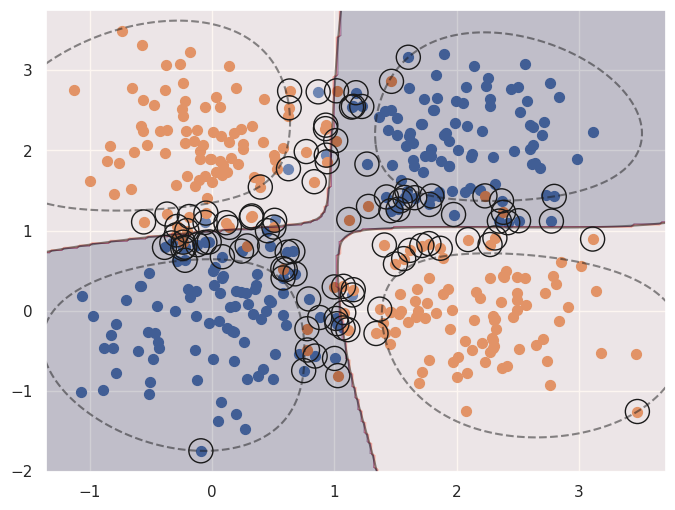

Erreur d'apprentissage = 5.8%
Erreur de test = 8.5%


In [13]:
for itest in [1,2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest)

    #####################################
    # METTRE VOTRE CODE ICI
    svc = svm.SVC(kernel='rbf', max_iter=-1)

    trainX, trainY, testX, testY=td.generate_data(itest)

    svc.fit(trainX, trainY)

    td.show_data_2D(trainX,trainY)
    td.plot_svc_decision_function(svc,plot_support=True)
    plt.show()

    score_train = svc.score(trainX, trainY) # à remplir
    print("Erreur d'apprentissage = {:.1f}%".format((1-score_train)*100))

    score_test = svc.score(testX, testY) # à remplir
    print("Erreur de test = {:.1f}%".format((1-score_test)*100))




<div class="alert alert-block alert-success">
QUESTION: Commentez les différences de comportement du classifieur.
</div>

**Réponse**

Certains noyaux permettent d'obtenir une meilleure discrimination que d'autres, avec le paramétrage par défaut. Le noyau 'RBF' semble le plus polyvalent sur les distributions étudiées. Le noyau 'sigmoid' le moins stable.

### Activité 1.3 : Influence des paramètres de régularisation

Nous étudions ici comment l'algorithme SVM est capable de gérer la présence de données aberrantes ("outliers" en anglais) en jouant sur ses paramètres de généralisation.

On génère différents niveaux de bruit en spécifiant le paramètre `noise` (entre 0 et 1) dans la fonction de génération de données:

>```python td.generate_data(family_number, noise=0.1) ```

Repérer le paramètre à spécifier pour fixer le paramètre de régularisation.

Etudier l'influence de ce paramètre sur le jeu de données 2 avec un noyau "rbf" en produisant différents résultats de classification (visualisation et erreur sur ensemble de test), et différentes valeurs de bruit.


Intricated data
XOR like distribution


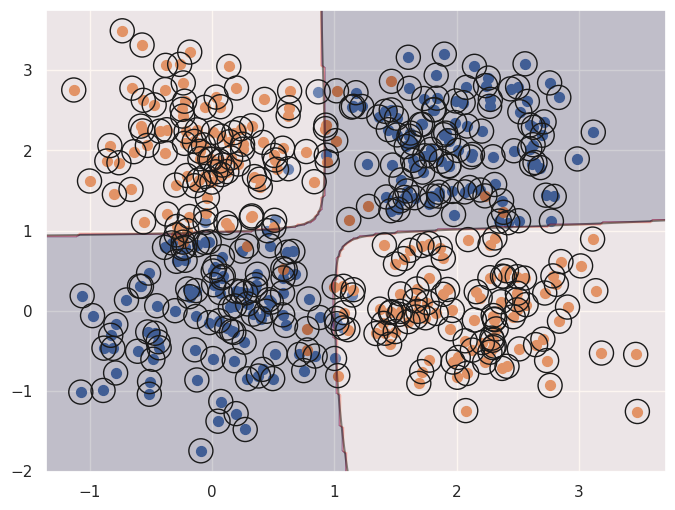

Erreur d'apprentissage = 6.2%
Erreur de test = 7.5%
XOR like distribution


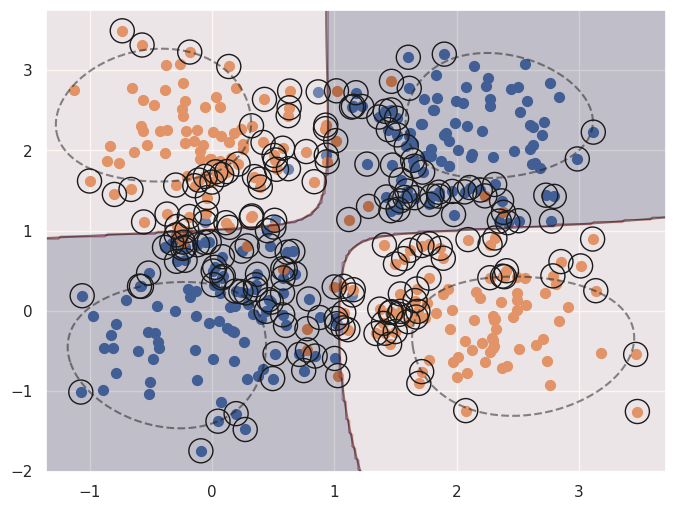

Erreur d'apprentissage = 6.0%
Erreur de test = 7.8%
XOR like distribution


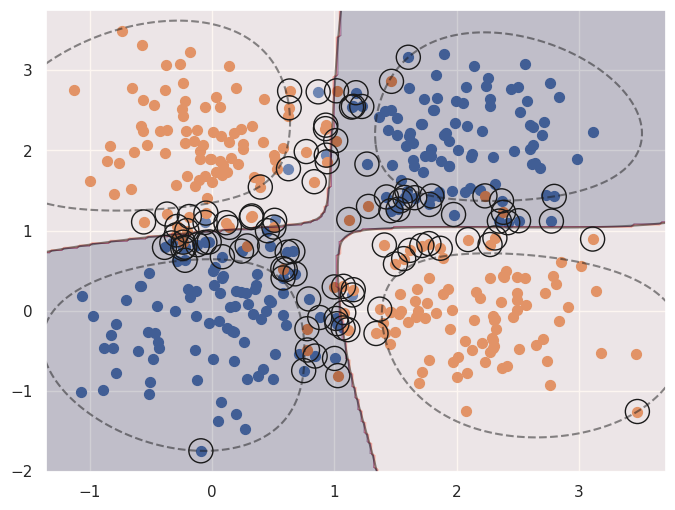

Erreur d'apprentissage = 5.8%
Erreur de test = 8.5%
XOR like distribution


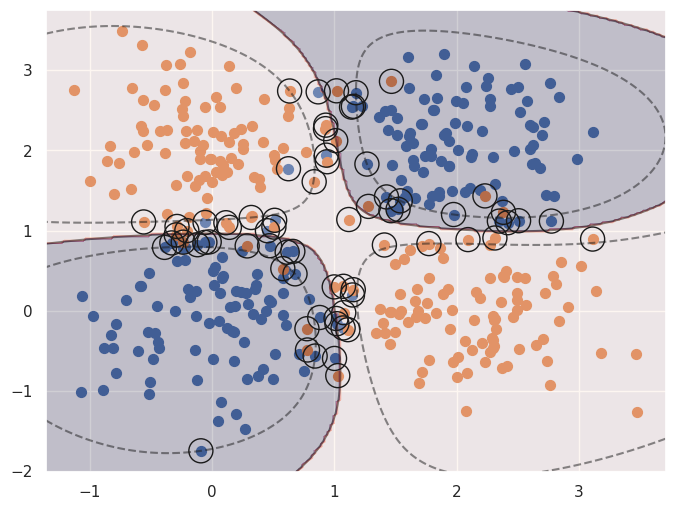

Erreur d'apprentissage = 5.5%
Erreur de test = 8.0%
XOR like distribution


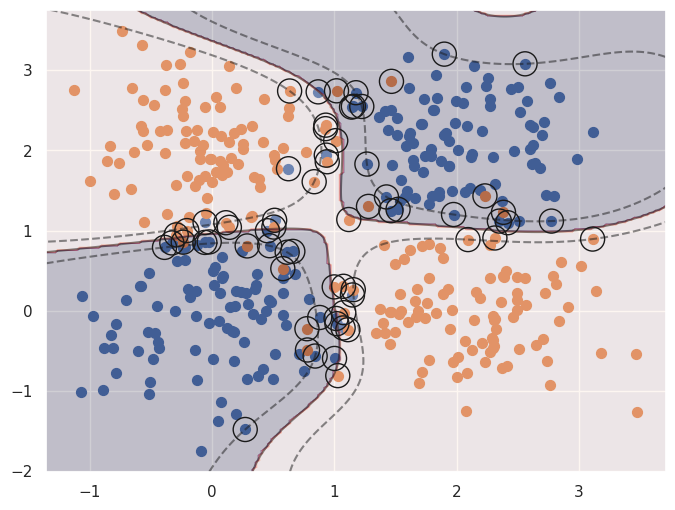

Erreur d'apprentissage = 4.2%
Erreur de test = 8.3%


In [16]:
trainX, trainY, testX, testY=td.generate_data(2, noise=0.05, seed=10)

# valeurs de C
Clist= [0.01,0.1,1,10,100]

for Cval in Clist:
    ###########################
    # METTRE VOTRE CODE ICI
    svc = svm.SVC(kernel='rbf', max_iter=-1, C=Cval)

    trainX, trainY, testX, testY=td.generate_data(itest)

    svc.fit(trainX, trainY)

    td.show_data_2D(trainX,trainY)
    td.plot_svc_decision_function(svc,plot_support=True)
    plt.show()

    score_train = svc.score(trainX, trainY) # à remplir
    print("Erreur d'apprentissage = {:.1f}%".format((1-score_train)*100))

    score_test = svc.score(testX, testY) # à remplir
    print("Erreur de test = {:.1f}%".format((1-score_test)*100))



Reproduisez les courbes montrant les écarts entre apprentissage et test pour différents paramètres de **régularisation**.


In [ ]:
fig, ax = plt.subplots()

trainX, trainY, testX, testY=td.generate_data(2, noise=0.2, seed = 10)

Clist=np.logspace(-2,1,20)

score_test=[]
score_train=[]

###########################
# METTRE VOTRE CODE ICI


#############################

ax.semilogx(Clist,1-np.array(score_train),label='learn')
ax.semilogx(Clist,1-np.array(score_test),label='test')

plt.title('Différence entre apprentissage et test')
plt.legend()
plt.show()


### Activité 1.4: Optimisation des paramètres par validation croisée



On cherche les meilleurs paramètres adaptés aux données, sans utiliser les données de test. On se propose ici d'utiliser une méthode systématique de recherche par validation croisée.

L'environnement scikit-learn permet d'automatiser cette recherche en utilisant la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Le principe d'utilisation de cette classe est d'estimer l'erreur de généralisation par validation croisée sur une grille de paramètres. Cette grille est définie comme un `dict` (ou une `list` de `dict`) où chaque clé contient une liste de paramètres. L'appel à la méthode `fit` sur le classifieur estime les performances sur l'ensemble des configurations possibles:


>```python clf = GridSearchCV(svc, parameter_dict) ```

>```python clf.fit(trainX, trainY) ```


Utiliser cette classe pour trouver la meilleure combinaison de paramètres (noyau, paramètres du noyau, coefficient de régularisation) pour les jeux de données 2 et 3.

A l'issue de l'étape de recherche des hyperparamètres par validation croisée, le meilleur préditeur est placé dans la variabe `best_estimator_` de la classe
`GridSearchCV`.


In [ ]:
# Import de la classe pour Validation Croisée
from sklearn.model_selection import GridSearchCV

svc = svm.SVC(shrinking=True,max_iter=1000000,gamma='auto') # max_iter = 1000000 pour limiter les non convergences de l'optimiseur

for itest in [2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest, noise=0.1)

    ################################""
    # METTRE VOTRE CODE ICI


<div class="alert alert-block alert-success">
QUESTION: Quelles configurations de paramètres optimales obtenez-vous?
</div>

**Réponse**


## Partie 2 : multi-classe avec SVM

Dans cette partie, l'objectif est de discriminer les données en plusieurs classes. Comme indiqué dans le cours, deux stratégies principales sont couramment utilisées: un contre un ("one vs. one") ou un contre les autres ("one vs. rest"). L'environnement scikit-learn contient une sur-classe [`multiclass`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass) capable de gérer ces deux types de stratégies.


Dans le cas des problèmes multi-classe, les performances sont usuellement évaluées sous la forme de [matrices de confusion](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


### Activité 2.1: stratégies de classification multi-classe


Comparez les deux stratégies multi-classe `OneVsOne` et `OneVsRest` sur les données du jeu de test 4 et un noyau polynomial. Utilisez pour cela la sur-classe `multiclass`, et fournir les matrices de confusion de la classification.



In [ ]:
# Utilisation des deux stratégies multi-classe ("one vs. one", "one vs. rest")
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Pour calculer une matrice de confusion
from sklearn.metrics import confusion_matrix

trainX, trainY, testX, testY=td.generate_data(4)

svc = svm.SVC(C=0.1, kernel='poly', degree=2, max_iter=10000, gamma='auto')


In [ ]:
#######################""
# METTRE VOTRE CODE ICI




<div class="alert alert-block alert-success">
QUESTION: Commentez les différences de comportement du classifieur.
</div>

**Réponse**

La répartition des données diffère selon les classes. Certaines classes ont deux modes, intriqués avec les autres distributions. Dans ce cas de figure, la stratégie "un contre un" semble la plus efficace (légèrement) car elle permet de mieux spécialiser les classifieurs à chaque type de difficulté.

### Activité 2.2: classification de chiffres manuscrits


On dispose d’un ensemble d’images de données de chiffres manuscrits. L’objectif de cette partie est de se mettre dans les conditions d’une compétition de reconnaissance des formes pour produire les meilleures performances sur l’ensemble de test pour lequel on ne connaît pas la vraie classe (« vérité terrain » = ground truth en anglais). Dans le cadre de ce TD, et pour situer le niveau de performances, on évaluera les classifieurs sur la base de test, mais elle ne devra pas être utilisée pour l'apprentissage.

Définissez une stratégie de recherche de paramètres par validation croisée sur les noyaux et leurs paramètres. Rem: on peut obtenir plus de 95% de reconnaissance sur la base de test. Visualisez quelques exemples de données mal classées.



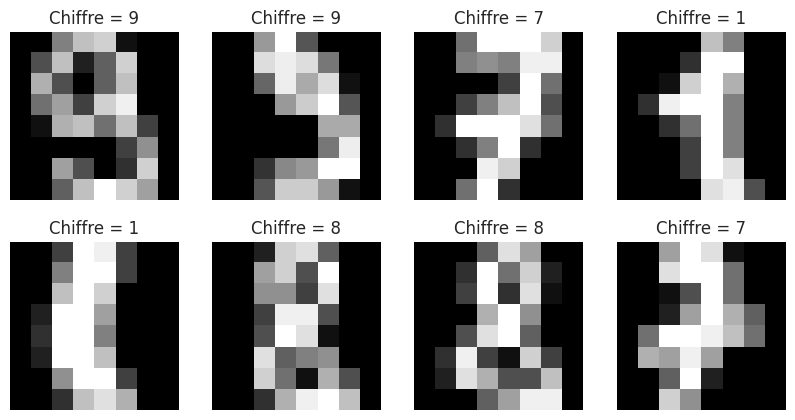

In [ ]:
#Chargement des données
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



images, classes = datasets.load_digits(return_X_y = True)
n_samples = len(images)
data = images.reshape((n_samples, -1))

#Constitution des bases d'apprentissage et de test
ntrain = 800
trainX = data[:ntrain,:]
trainY = classes[:ntrain]
testX = data[ntrain:-1,:]
testY = classes[ntrain:-1]

#Visu des données
fig, axes = plt.subplots(2, 4, figsize=(10,5))

for ax in axes.flat:
    isample = np.random.randint(trainX.shape[0])
    ax.imshow(trainX[isample].reshape(8,8),cmap='gray')
    ax.set_title("Chiffre = {}".format(trainY[isample]))
    ax.axis('off')

plt.show()

In [ ]:
##############################
# METTRE VOTRE CODE ICI



##############################

bestsvc = clf.best_estimator_

print("\nBest score = {:.2f}% with kernel {}".format(100*clf.best_score_, bestsvc.kernel))
if bestsvc.kernel == 'rbf':
    print("Parameters are gamma = {:.2g} and C = {:2g}".format(bestsvc.gamma, bestsvc.C))
elif bestsvc.kernel == 'poly':
    print("Parameters are degree = {} and C = {:2g}".format(bestsvc.degree, bestsvc.C))

predY=bestsvc.predict(testX)
print(confusion_matrix(testY, predY))

nequal = (predY == testY).sum()
print("Taux de reco = {:.2f}%".format(nequal/testY.shape[0]*100))


In [ ]:
# Visualisation des données mal classées

ibad=(predY != testY).nonzero()[0]

fig, axes = plt.subplots(2, 4, figsize=(10,5))
for ax in axes.flat:
    isample = ibad[np.random.randint(ibad.shape[0])]
    ax.imshow(testX[isample].reshape(8,8),cmap='gray')
    ax.set_title("Predit {} au lieu de {}".format(predY[isample], testY[isample]))
    ax.axis('off')

plt.show()


In [ ]:
# Autre version avec LinearSVC (beaucoup plus rapide)

parameters = {'C':np.logspace(-3, 3, 7)}
svc = svm.LinearSVC(max_iter=10000, tol=1e-3, verbose=True, dual=False)

clf = GridSearchCV(cv=5,estimator=svc, param_grid=parameters)
clf.fit(trainX, trainY)

bestsvc = clf.best_estimator_

print("\nBest score = {:.2f}% with C={:.2g}".format(100*clf.best_score_, bestsvc.C))

predY=bestsvc.predict(testX)
print(confusion_matrix(testY, predY))

nequal = (predY == testY).sum()
print("Taux de reco = {:.2f}%".format(nequal/testY.shape[0]*100))


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]
Best score = 91.00% with C=0.001
[[ 96   0   0   0   1   0   0   0   0   0]
 [  0  87   2   1   1   0   1   0   3   6]
 [  2   0  94   0   0   0   0   0   0   0]
 [  0   5   0  86   0   3   0   2   4   1]
 [  1   1   0   0  94   0   3   0   0   3]
 [  0   0   0   0   0  98   1   0   0   3]
 [  0   1   0   0   0   0 101   0   0   0]
 [  0   0   0   0   0   1   0  98   1   0]
 [  0   4   0   1   0   6   2   0  74   7]
 [  2   0   0   2   0   2   0   1   2  92]]
Taux de reco = 92.37%
